 <div style="text-align:center; color:Blue;font-size:30px">MULTILAYER PERCEPTRON</div>


In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dill
import random

from sklearn.datasets import load_iris

In [263]:
iris_data=load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [264]:
iris_data.__dir__()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

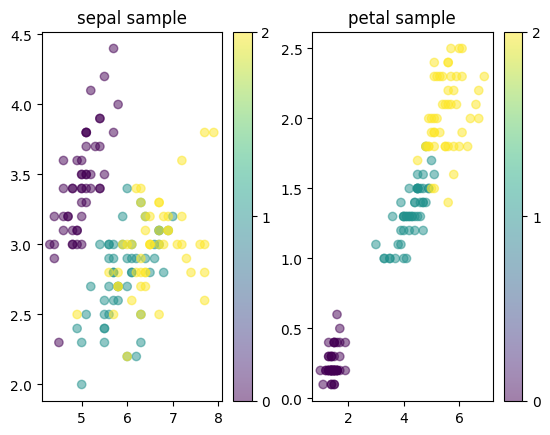

In [265]:
plt.subplot(1,2,1)
scatter_plot_1=plt.scatter(iris_data.data[:,0],iris_data.data[:,1],alpha=0.5,c=iris_data.target)
plt.colorbar(ticks=[0,1,2])
plt.title("sepal sample")

plt.subplot(1,2,2)
scatter_plot_2=plt.scatter(iris_data.data[:,2],iris_data.data[:,3],alpha=0.5,c=iris_data.target)
plt.colorbar(ticks=[0,1,2])
plt.title("petal sample")

plt.show()

In [266]:
dataset=pd.read_csv("Downloads/IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

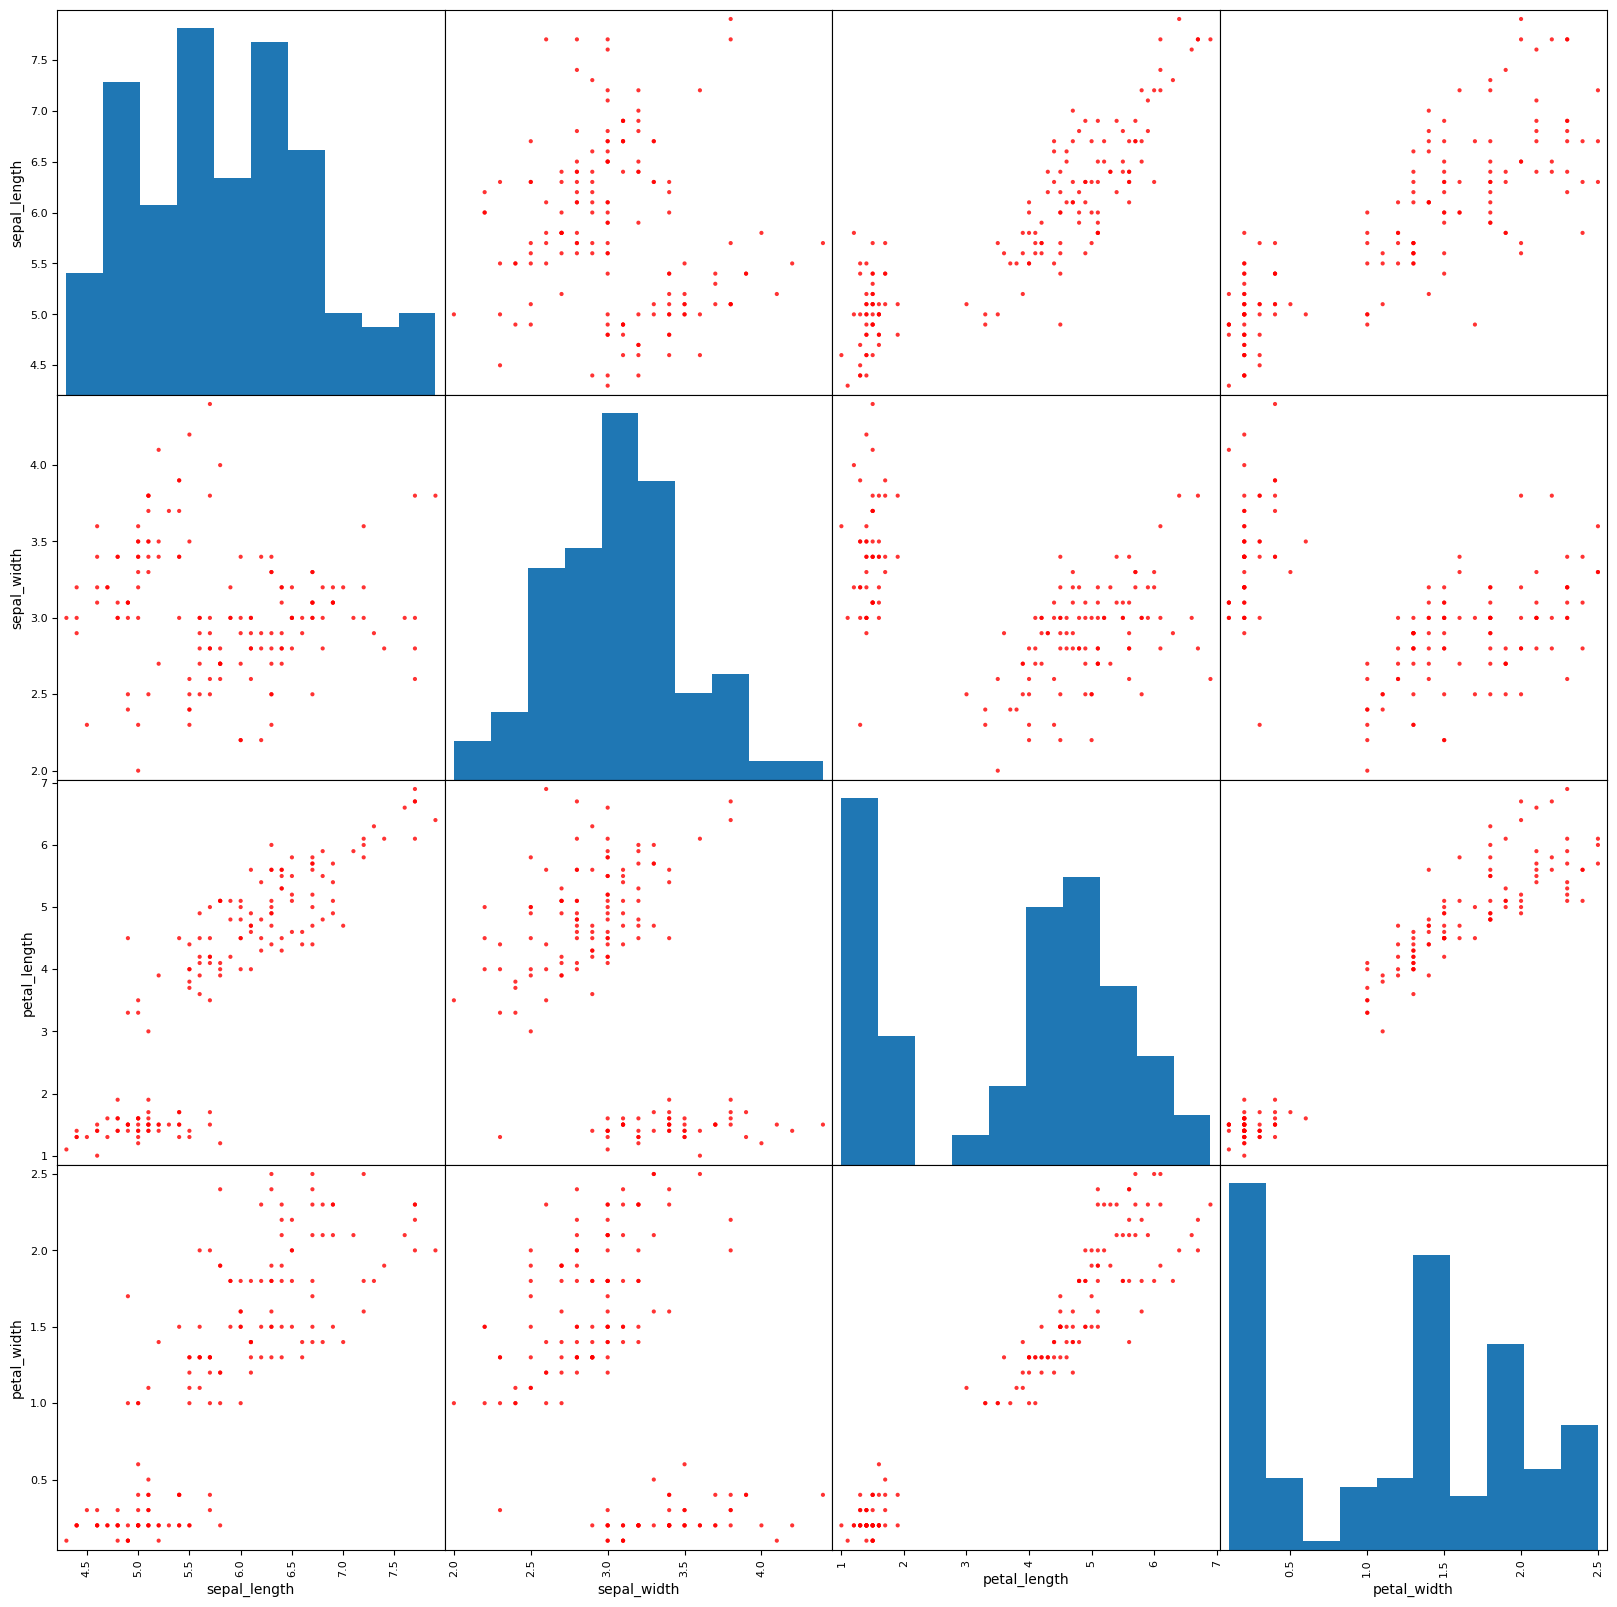

In [267]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset,alpha=0.8,figsize=(20,20),color='red')

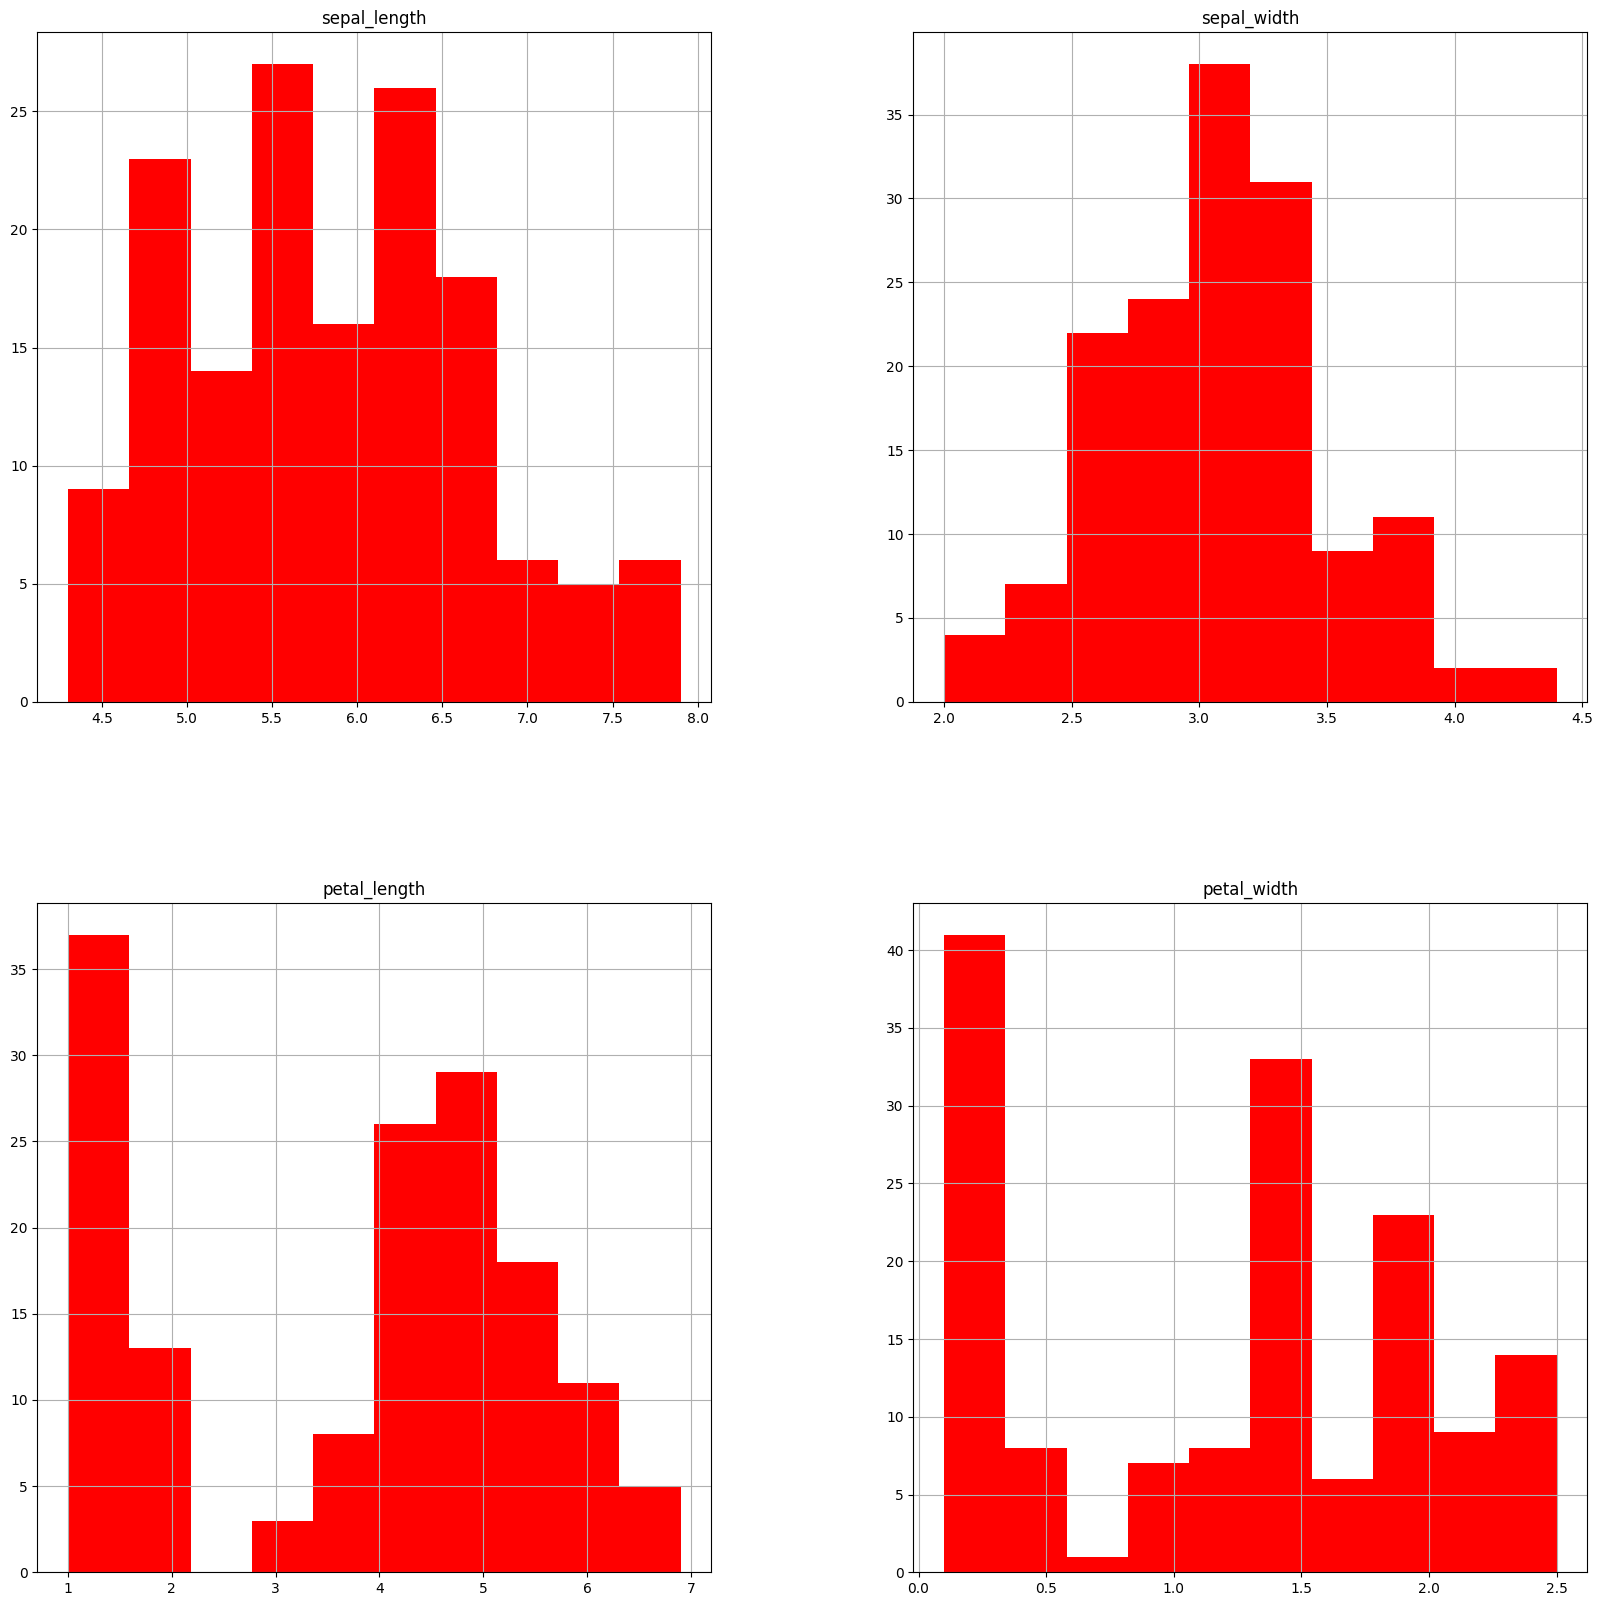

In [268]:
dataset.hist(figsize=(20,20),color='red')
plt.show()

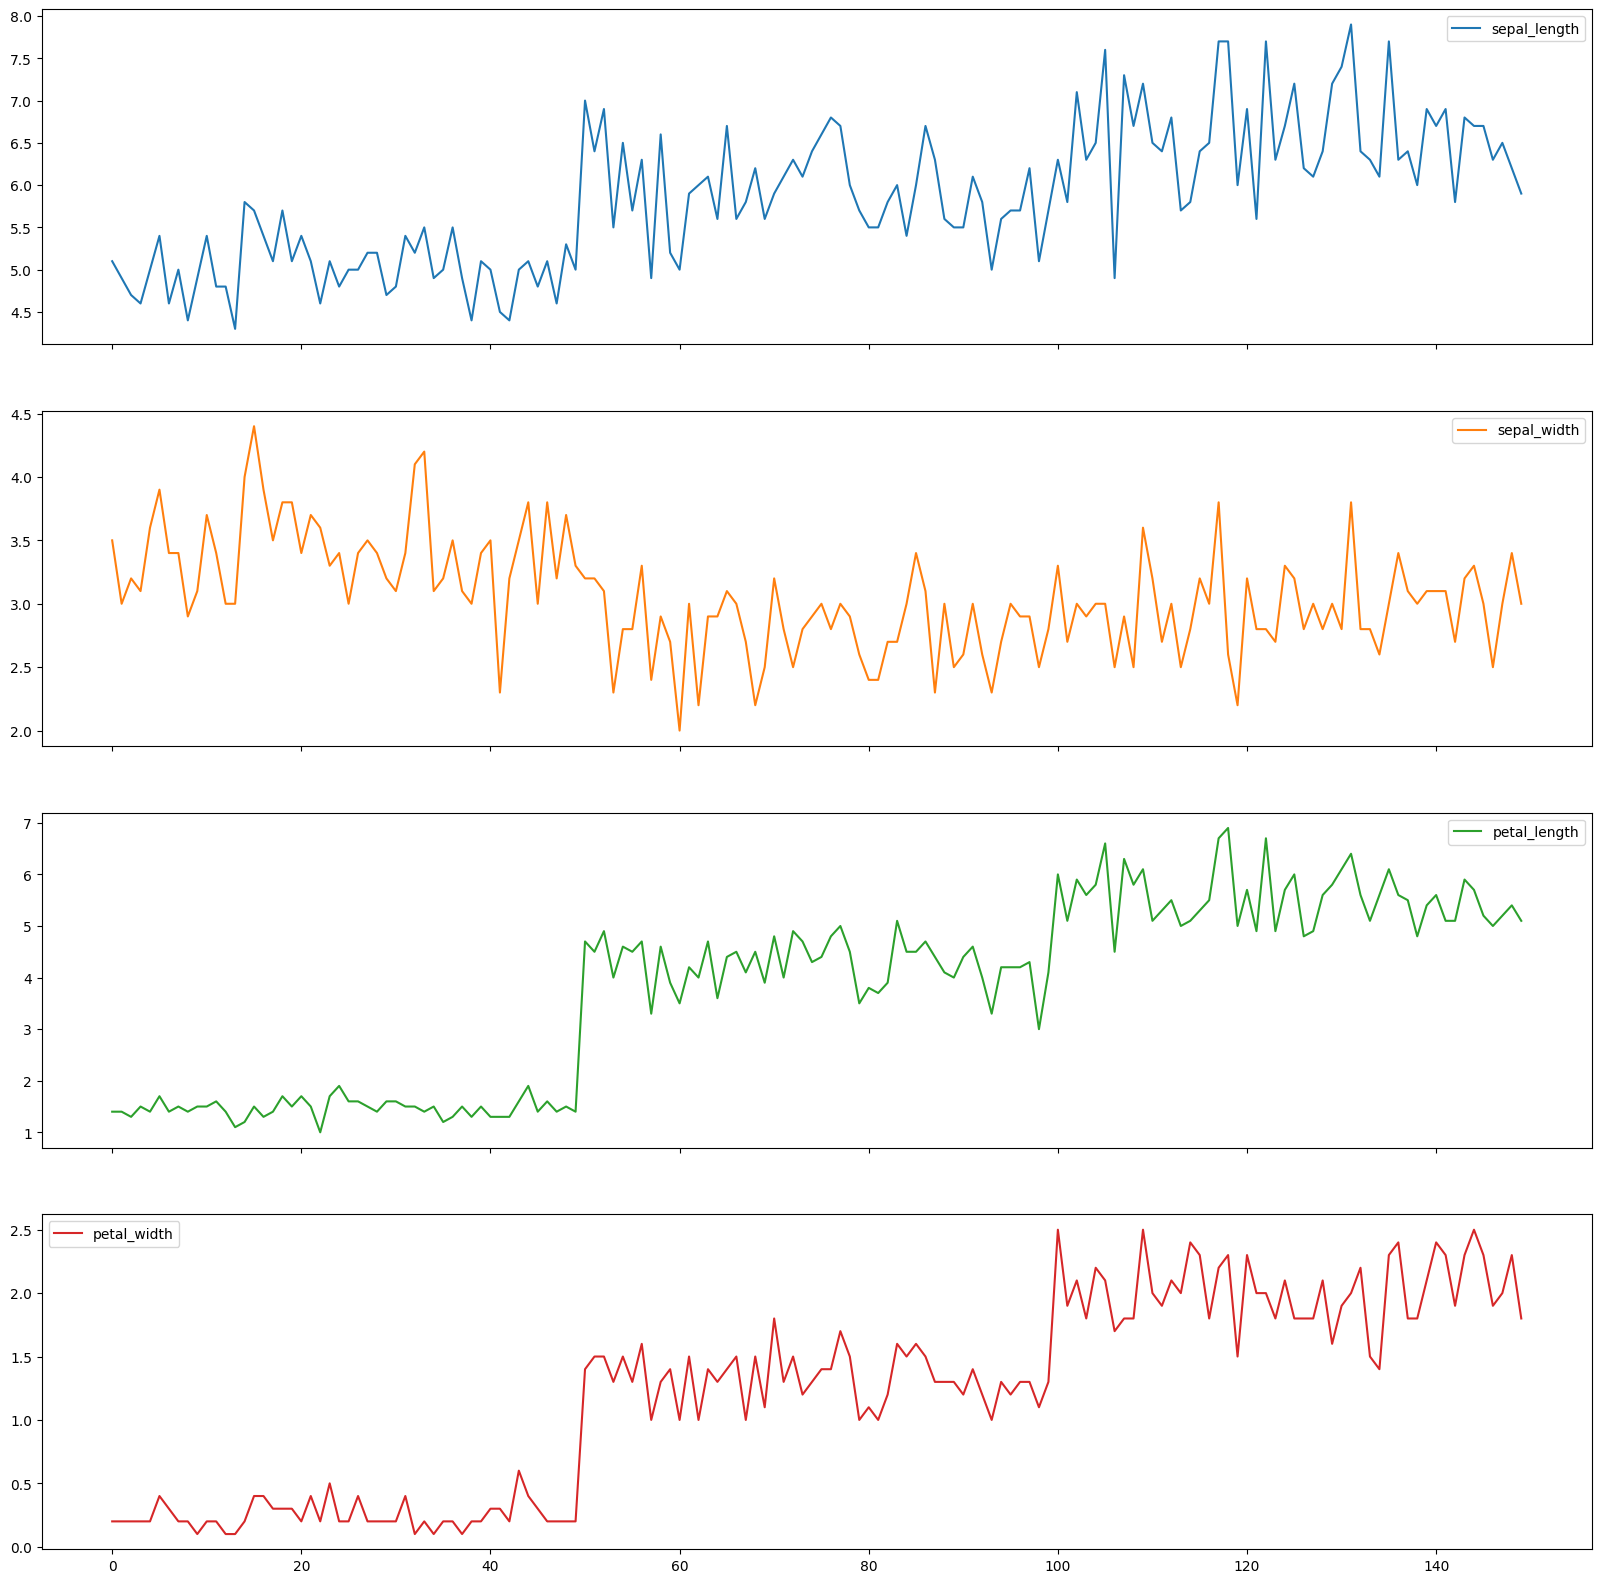

In [269]:
dataset.plot(figsize=(20,20),subplots=True,sharex=True,sharey=False)
plt.show()

In [270]:
def train_test_split():
    A=iris_dataset[:40]
    tA=iris_dataset[40:50]
    B=iris_dataset[50:90]
    tB=iris_dataset[90:100]
    C=iris_dataset[100:140]
    tC=iris_dataset[140:150]
    train=np.concatenate((A,B,C))
    test=np.concatenate((tA,tB,tC))
    return train,test
                        

In [271]:
iris_dataset=np.column_stack((iris_data.data,iris_data.target))

In [272]:
np.random.seed(7)
np.random.shuffle(iris_dataset)
iris_dataset[:5]

array([[5.9, 3. , 5.1, 1.8, 2. ],
       [5.4, 3. , 4.5, 1.5, 1. ],
       [5. , 3.5, 1.3, 0.3, 0. ],
       [5.6, 3. , 4.5, 1.5, 1. ],
       [4.9, 2.5, 4.5, 1.7, 2. ]])

In [273]:
train_data,test_data=train_test_split()
len(train_data),len(test_data)

(120, 30)

In [274]:
percent_train_data=(len(train_data)/len(iris_dataset))*100
percent_test_data=100-percent_train_data
print(f"percent of data for training :{percent_train_data}\npercent of data for testing:{percent_test_data}")

percent of data for training :80.0
percent of data for testing:20.0


In [275]:
train_X=np.array([i[:4] for i in train_data])
val_X=np.array([i[:4] for i in test_data])
train_y=np.array([i[4] for i in train_data])
val_y=np.array([i[4] for i in test_data])

In [412]:


class MultilayerPerceptron():
    activation_functions = {
        "sigmoid": (lambda x: 1 / (1 + np.exp(-x))),
        "tanh": (lambda x: np.tanh(x)),
        "Relu": (lambda x: x * (x > 0))
    }
    derivative_functions = {
        "sigmoid": (lambda x: x * (1 - x)),
        "tanh": (lambda x: 1 - np.power(np.tanh(x), 2)),
        "Relu": (lambda x: 1 * (x > 0))
    }

    def __init__(self, params=dict()):
        self.inputLayer = params['InputLayer'] if params.get('InputLayer') else 4
        self.hiddenLayer = params['HiddenLayer'] if params.get('HiddenLayer') else 5
        self.outputLayer = params['OutputLayer'] if params.get('OutputLayer') else 3
        self.BiasHiddenValue = params['BiasHiddenValue'] if params.get('BiasHiddenValue') else -1
        self.BiasOutputValue = params['BiasOutputValue'] if params.get('BiasOutputValue') else -1
        self.learningRate = params['LearningRate'] if params.get('LearningRate') else 0.05
        self.max_epochs = params['Epochs'] if params.get('Epochs') else 700
        self.activation = self.activation_functions[params['ActivationFunction']] if params.get('ActivationFunction') else self.activation_functions['sigmoid']
        self.deriv = self.derivative_functions[params['ActivationFunction']] if params.get('ActivationFunction') else self.derivative_functions['sigmoid']
        self.classes = 3
        self.hidden_WEIGHTS = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.output_WEIGHTS = self.starting_weights(self.outputLayer, self.hiddenLayer)
        self.hidden_BIAS = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.output_BIAS = np.array([self.BiasOutputValue for i in range(self.outputLayer)])

    def starting_weights(self, x, y):
        weights = list()
        for i in range(y):
            sub_weights = list()
            for j in range(x):
                sub_weights.append(2 * np.random.random() - 1)
            weights.append(sub_weights)
        return np.array(weights)

    def backpropegation(self, x):
        ERROR_output = self.output - self.layer2_output
        DELTA_output = ((-1 * ERROR_output) + self.deriv((self.layer2_output)))
        for i in range(self.hiddenLayer):
            for j in range(self.outputLayer):
                self.output_WEIGHTS[i][j] -= (self.learningRate * (DELTA_output[j] - self.layer1_output[i]))
                self.output_BIAS[j] -= (self.learningRate * DELTA_output[j])
        delta_hidden = np.matmul(self.output_WEIGHTS, DELTA_output) * self.deriv(self.layer1_output)
        for i in range(self.outputLayer):
            for j in range(self.hiddenLayer):
                self.hidden_WEIGHTS[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.hidden_BIAS[j] -= (self.learningRate * delta_hidden[j])

    def show_losses(self, error_list, epoch_list):
        plt.figure(figsize=(10, 4))
        plt.plot(epoch_list, error_list, color='red')
        plt.title("Loss Minimization")
        plt.ylabel("Mean Squared Error")
        plt.xlabel("No of Epochs")
        plt.show()

    def fit(self, X, y):
        epoch_count = 1
        total_error = 0
        n_features = len(X)
        epoch_list = []
        error_list = []
        layer1_weights = []
        layer2_weights = []

        while epoch_count < self.max_epochs:
            for i, inputs in enumerate(X):
                self.output = np.zeros(self.classes)  # one hot encoding
                if y[i] == 0:
                    self.output = np.array([1, 0, 0])
                elif y[i] == 1:
                    self.output = np.array([0, 1, 0])
                elif y[i] == 2:
                    self.output = np.array([0, 0, 1])

                # forward propagation
                self.layer1_output = self.activation((np.dot(inputs, self.hidden_WEIGHTS) + self.hidden_BIAS.T))
                self.layer2_output = self.activation((np.dot(self.layer1_output, self.output_WEIGHTS) + self.output_BIAS.T))

                for i in range(self.outputLayer):
                    error = (self.output[i] - self.layer2_output[i]) ** 2
                    total_error += error

                self.backpropegation(inputs)
            total_error = total_error / n_features

            if (epoch_count % 50 == 0) or (epoch_count == 1):
                print(f"EPOCH {epoch_count} - TOTAL ERROR: {total_error}")
                epoch_list.append(epoch_count)
                error_list.append(total_error)
                layer1_weights.append(self.hidden_WEIGHTS)
                layer2_weights.append(self.output_WEIGHTS)
            epoch_count += 1

        self.show_losses(error_list, epoch_list)
        plt.plot(layer1_weights[0])
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.title("hidden layer weights during training")
        plt.show()
        plt.plot(layer2_weights[0])
        plt.title("output layer weights during training")
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.show()

    def predict(self, X):
        my_predictions = []
        hidden_output = np.matmul(X, self.hidden_WEIGHTS) + self.hidden_BIAS
        output_output = np.matmul(hidden_output, self.output_WEIGHTS) + self.output_BIAS

        for i in output_output:
            my_predictions.append(max(enumerate(i), key=lambda x: x[1])[0])

        return my_predictions

    def validate(self, X, y):
        my_predictions = self.predict(X)
        predictions = []
        num_rows = len(my_predictions)
        accuracy = 0
        true_type = {
            0: 'Iris-setosa',
            1: 'Iris-versicolour',
            2: 'Iris-virginica'
        }

        for i in range(num_rows):
            if my_predictions[i] == 0:
                predictions.append([i, 'Iris-setosa', my_predictions[i], true_type[int(y[i])], y[i]])
            elif my_predictions[i] == 1:
                predictions.append([i, 'Iris-versicolour', my_predictions[i], true_type[int(y[i])], y[i]])
            elif my_predictions[i] == 2:
                predictions.append([i, 'Iris-virginica', my_predictions[i], true_type[int(y[i])], y[i]])

        pred_dataframe = pd.DataFrame(predictions, columns=['id', 'predicted_type', 'output', 'true_type', 'true_value'])
        positive_results = len(pred_dataframe.query('output == true_value'))
        accuracy = positive_results / num_rows
        print(f"accuracy: {accuracy * 100}")
        return pred_dataframe



In [413]:
params={'InputLayer':4,'HiddenLayer':4,'OutputLayer':3,'Epochs':1000,
        'LearningRate':0.01,'BiasHiddenValue':1,'BiasOutputValue':1,'ActivationFunction':'sigmoid'}

In [414]:
MPerceptron=MultilayerPerceptron(params)

In [373]:
Perceptron=MultilayerPerceptron()

EPOCH 1 - TOTAL ERROR: 0.9493115622066844
EPOCH 50 - TOTAL ERROR: 0.5451289244279584
EPOCH 100 - TOTAL ERROR: 0.5443846247746549
EPOCH 150 - TOTAL ERROR: 0.5451170356345757
EPOCH 200 - TOTAL ERROR: 0.5327960620346986
EPOCH 250 - TOTAL ERROR: 0.5093097306448816
EPOCH 300 - TOTAL ERROR: 0.5009200217163275
EPOCH 350 - TOTAL ERROR: 0.4968006781030747
EPOCH 400 - TOTAL ERROR: 0.4943032873771514
EPOCH 450 - TOTAL ERROR: 0.492608755091762
EPOCH 500 - TOTAL ERROR: 0.4913722953841182
EPOCH 550 - TOTAL ERROR: 0.4904232222437637
EPOCH 600 - TOTAL ERROR: 0.48966714115180704
EPOCH 650 - TOTAL ERROR: 0.4890473492178878


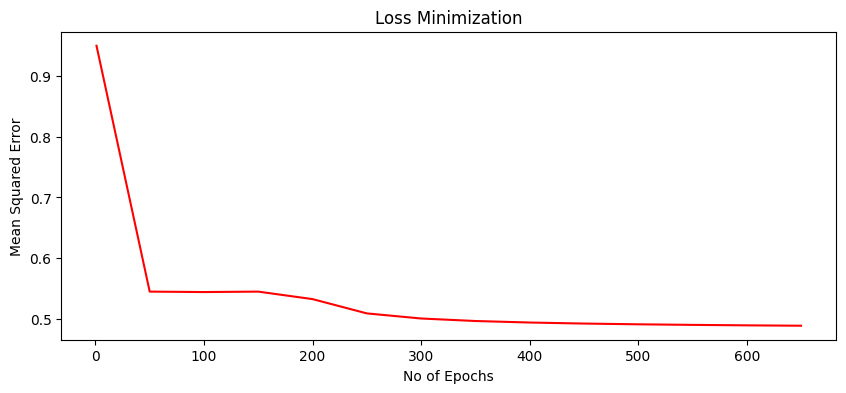

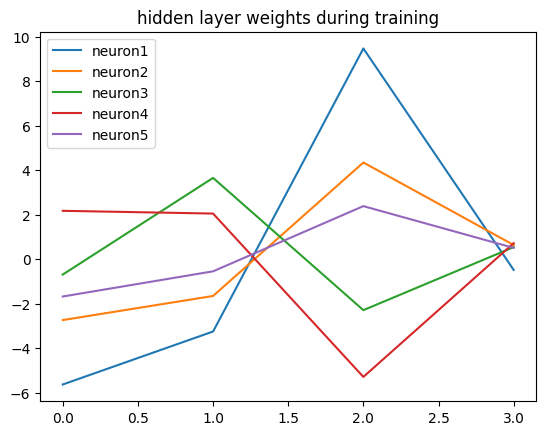

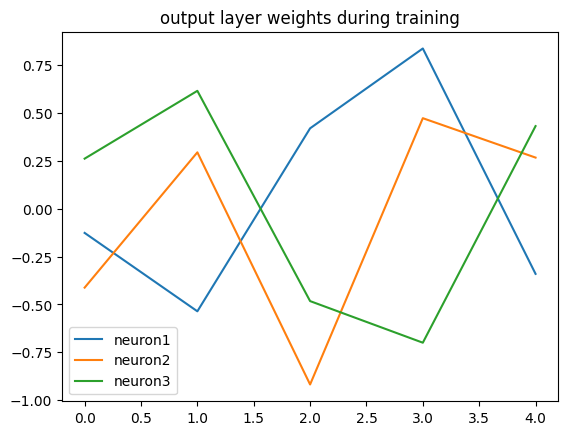

In [374]:
Perceptron.fit(train_X,train_y)

EPOCH 1 - TOTAL ERROR: 0.8130522971330026
EPOCH 50 - TOTAL ERROR: 0.7152782774591118
EPOCH 100 - TOTAL ERROR: 0.6290116947651222
EPOCH 150 - TOTAL ERROR: 0.6175379774450931
EPOCH 200 - TOTAL ERROR: 0.611183624082393
EPOCH 250 - TOTAL ERROR: 0.6067284705154579
EPOCH 300 - TOTAL ERROR: 0.6033303666075678
EPOCH 350 - TOTAL ERROR: 0.600617663543214
EPOCH 400 - TOTAL ERROR: 0.5983864090317014
EPOCH 450 - TOTAL ERROR: 0.5965106490968798
EPOCH 500 - TOTAL ERROR: 0.5949066245792839
EPOCH 550 - TOTAL ERROR: 0.5935157531902288
EPOCH 600 - TOTAL ERROR: 0.5922955364619094
EPOCH 650 - TOTAL ERROR: 0.5912142734861914
EPOCH 700 - TOTAL ERROR: 0.5902477879082295
EPOCH 750 - TOTAL ERROR: 0.58937730166075
EPOCH 800 - TOTAL ERROR: 0.5885880010326324
EPOCH 850 - TOTAL ERROR: 0.5878680404527608
EPOCH 900 - TOTAL ERROR: 0.5872078334132063
EPOCH 950 - TOTAL ERROR: 0.5865995374803625


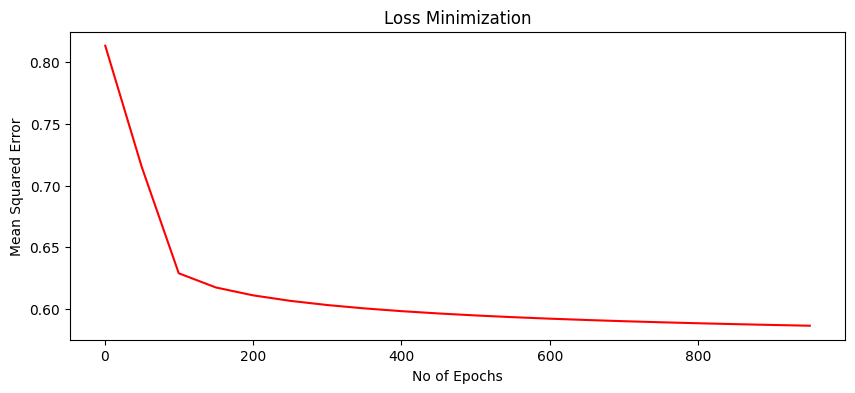

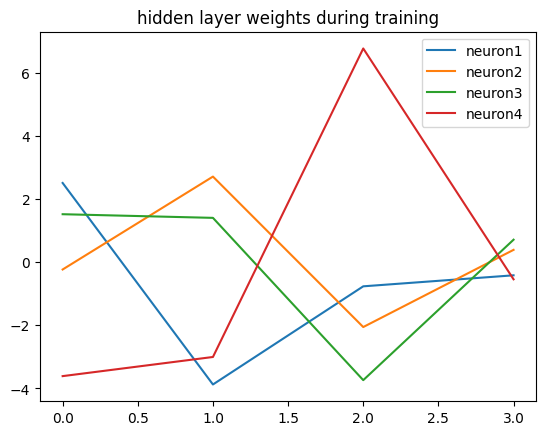

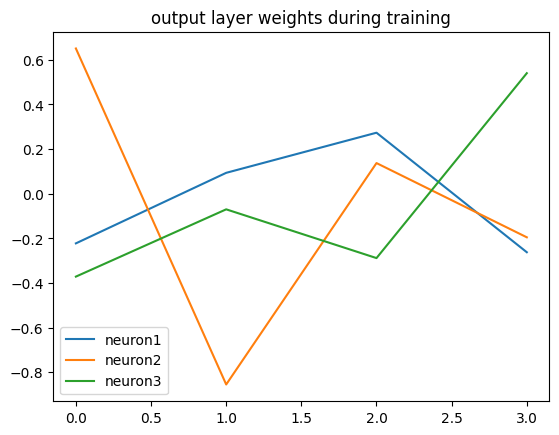

In [415]:
MPerceptron.fit(train_X,train_y)

In [416]:
predictions_no_params=Perceptron.validate(val_X,val_y)

accuracy: 80.0


In [417]:
predictions=MPerceptron.validate(val_X,val_y)

accuracy: 96.66666666666667


In [422]:
predictions.head()

,id,predicted_type,output,true_type,true_value
0,0,Iris-virginica,2,Iris-virginica,2.0
1,1,Iris-versicolour,1,Iris-versicolour,1.0
2,2,Iris-virginica,2,Iris-virginica,2.0
3,3,Iris-virginica,2,Iris-virginica,2.0
4,4,Iris-versicolour,1,Iris-versicolour,1.0


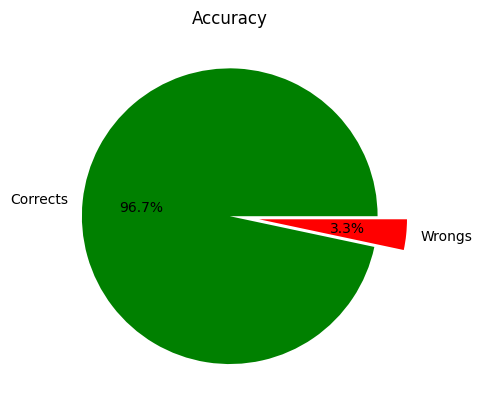

In [426]:
true=len(predictions.query('output==true_value'))
false=predictions.shape[0]-true
labels='Corrects','Wrongs'
sizes=[96.67,100-96.67]
plt.pie((true,false),explode=(0,0.2),labels=labels,colors=('green','red'),autopct='%1.1f%%')
plt.title("Accuracy")
plt.show()